# A neural network model traainde on fashion mnist dataset which is availlable in tenserflow keras library

.

import required libraries and functions

In [7]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import the dataset

In [8]:
from tensorflow.keras.datasets import fashion_mnist

load the data

In [9]:
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

### take a look at the data

In [10]:
# inspect the shape of data and label
train_data.shape, train_label.shape

((60000, 28, 28), (60000,))

In [11]:
# inspect the data
train_data[0], train_label[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

### create class list for the labels
   (information about label and class is available in the docstring of the dataset and are also available on https://github.com/zalandoresearch/fashion-mnist)

In [12]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

##take a look at images and their labels

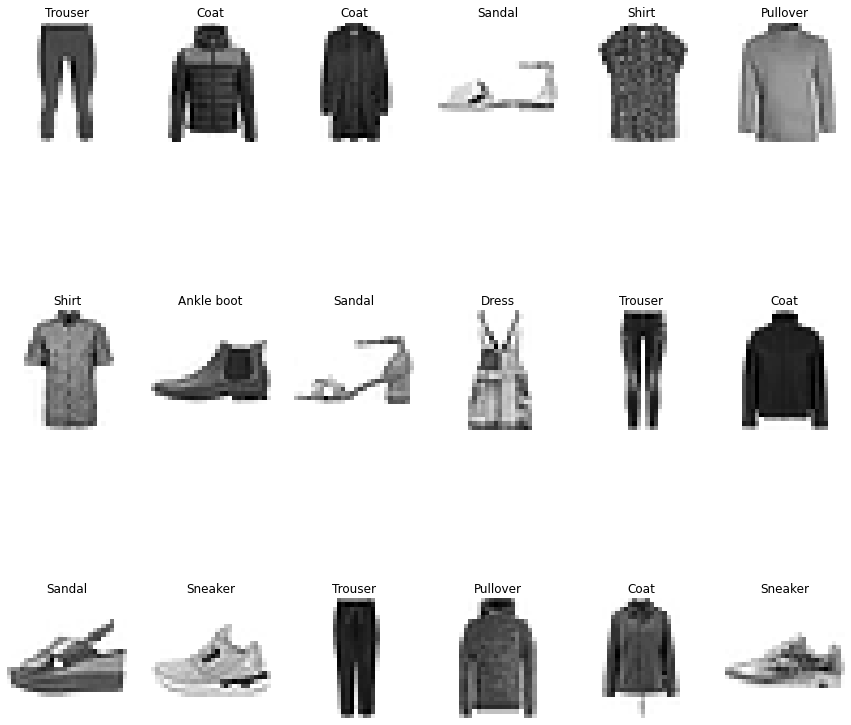

In [19]:
# ploat mltiple samples
import random
no_of_samples = 18

plt.figure(figsize=(15,15))

for i in range(no_of_samples):
    ax = plt.subplot(3,6,i+1)
    ran_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[ran_index], cmap = plt.cm.binary)
    plt.title(class_name[train_label[ran_index]])
    plt.axis(False)

## normalise the data
   neural network performs better with normalised data (scales between zero and one)

In [25]:
# check the maximum and minimum values in the data
train_data.max(), train_data.min()

(255, 0)

In [26]:
# normalise the data by dividing with the maximum value
train_data_norm = train_data/train_data.max()
test_data_norm = test_data/test_data.max()

# build the model

In [96]:
# set random seed
tf.random.set_seed(42)

# Buld the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),   # converts the shape (28,28) to (None,784)
    tf.keras.layers.Dense(10, activation = "tanh"),  # non linear activation
    tf.keras.layers.Dense(10, activation = "tanh"),
    tf.keras.layers.Dense(10, activation = "softmax") # softmax activation for output layer of multiclass classification model
])

# compile the model
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

## fit the model_1

In [97]:
history_1 = model_1.fit(train_data_norm, train_label, epochs = 10, validation_data=(test_data_norm, test_label))

Epoch 1/10
1875/1875 [==============================] - 2s 738us/step - loss: 0.7372 - accuracy: 0.7819 - val_loss: 0.5203 - val_accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 1s 657us/step - loss: 0.4640 - accuracy: 0.8395 - val_loss: 0.4968 - val_accuracy: 0.8330
Epoch 3/10
1875/1875 [==============================] - 1s 662us/step - loss: 0.4266 - accuracy: 0.8491 - val_loss: 0.4724 - val_accuracy: 0.8303
Epoch 4/10
1875/1875 [==============================] - 1s 683us/step - loss: 0.4060 - accuracy: 0.8568 - val_loss: 0.4742 - val_accuracy: 0.8333
Epoch 5/10
1875/1875 [==============================] - 1s 667us/step - loss: 0.3973 - accuracy: 0.8583 - val_loss: 0.4621 - val_accuracy: 0.8380
Epoch 6/10
1875/1875 [==============================] - 1s 738us/step - loss: 0.3863 - accuracy: 0.8619 - val_loss: 0.4603 - val_accuracy: 0.8366
Epoch 7/10
1875/1875 [==============================] - 1s 691us/step - loss: 0.3803 - accuracy: 0.8640 - val_loss: 0.4339 -

# evaluate

In [98]:
# model summery
model_1.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 784)               0         
                                                                 
 dense_72 (Dense)            (None, 10)                7850      
                                                                 
 dense_73 (Dense)            (None, 10)                110       
                                                                 
 dense_74 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [99]:
# evaluate model
model_1.evaluate(test_data_norm, test_label)

313/313 [==============================] - 0s 550us/step - loss: 0.4275 - accuracy: 0.8514


[0.42752495408058167, 0.8514000177383423]

<AxesSubplot:>

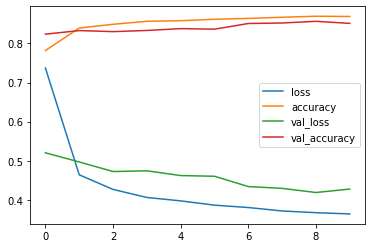

In [100]:
# plot the loss curve
pd.DataFrame(history_1.history).plot()

In [101]:
## tweek the model for better results
# set random seed
tf.random.set_seed(42)

# Buld the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),  
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(80, activation = "tanh"), 
    tf.keras.layers.Dense(50, activation = "tanh"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

In [102]:
# fit the model
history_2 = model_2.fit(train_data_norm, train_label, epochs = 10, validation_data=(test_data_norm, test_label))

Epoch 1/10
1875/1875 [==============================] - 2s 952us/step - loss: 0.4810 - accuracy: 0.8272 - val_loss: 0.4175 - val_accuracy: 0.8461
Epoch 2/10
1875/1875 [==============================] - 2s 872us/step - loss: 0.3621 - accuracy: 0.8666 - val_loss: 0.4630 - val_accuracy: 0.8425
Epoch 3/10
1875/1875 [==============================] - 2s 863us/step - loss: 0.3286 - accuracy: 0.8781 - val_loss: 0.3786 - val_accuracy: 0.8634
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3073 - accuracy: 0.8851 - val_loss: 0.3611 - val_accuracy: 0.8661
Epoch 5/10
1875/1875 [==============================] - 2s 863us/step - loss: 0.2922 - accuracy: 0.8906 - val_loss: 0.3543 - val_accuracy: 0.8729
Epoch 6/10
1875/1875 [==============================] - 2s 885us/step - loss: 0.2759 - accuracy: 0.8965 - val_loss: 0.3685 - val_accuracy: 0.8648
Epoch 7/10
1875/1875 [==============================] - 2s 904us/step - loss: 0.2664 - accuracy: 0.9001 - val_loss: 0.3626 - v

### evaluate model_2

In [103]:
# model summery
model_2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_75 (Dense)            (None, 100)               78500     
                                                                 
 dense_76 (Dense)            (None, 80)                8080      
                                                                 
 dense_77 (Dense)            (None, 50)                4050      
                                                                 
 dense_78 (Dense)            (None, 10)                510       
                                                                 
Total params: 91,140
Trainable params: 91,140
Non-trainable params: 0
_________________________________________________________________


In [104]:
# evaluate model
model_2.evaluate(test_data_norm, test_label)

313/313 [==============================] - 0s 582us/step - loss: 0.3324 - accuracy: 0.8837


[0.33235278725624084, 0.8837000131607056]

<AxesSubplot:>

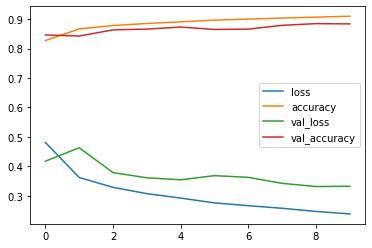

In [105]:
# plot the loss curve
pd.DataFrame(history_2.history).plot()

# draw the confusion matrix

In [94]:
# make the confusion matrix function
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    """
    This function creates congusion Matrix
    """
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes 
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [107]:
# make predictions 
y_probs = model_2.predict(test_data_norm)  # prediction probabilities
y_probs[0]

array([9.6397052e-06, 2.0997802e-05, 3.0004635e-06, 5.8202459e-06,
       8.2882989e-06, 7.8973401e-04, 5.5832543e-06, 5.1715863e-03,
       1.3900922e-06, 9.9398392e-01], dtype=float32)

In [108]:
# convert prediction probabilities into predictions (intehers)
y_pred = y_probs.argmax(axis = 1)
y_pred[0]

9

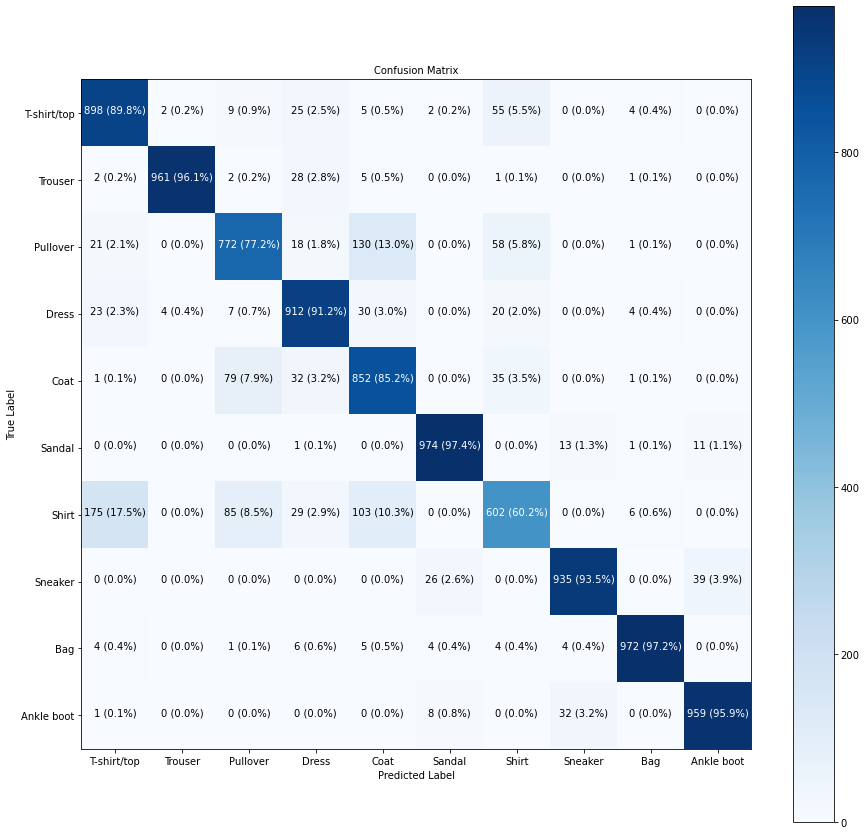

In [113]:
# plot the confusion matrix
make_confusion_matrix(test_label, y_pred, classes= class_name, figsize=(15,15), text_size=10)

## Randomley selected images from dataset with predicted and true labels

In [114]:
# create function to test random images

import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image plot it and label it with predicted and true lables.
    
    can be used for for evaluation of image classification model
    """
    
    # set a random integer
    i = random.randint(0, len(images))
    
    # select target image and make prediction on it
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(tf.expand_dims(images[0], axis = 0).shape.as_list())) # predicted probabilities
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # plot the image
    plt.imshow(target_image, cmap = plt.cm.binary)
    
    # change color of title depending on prediction
    
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
        
    # xlabel information (predicted and true label)
    plt.xlabel("Prediction : {} {:2.0f}% (True : {})". format(pred_label, 100* tf.reduce_max(pred_probs),
                                                                 true_label), color = color)

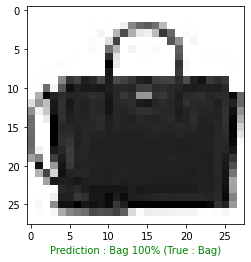

In [124]:
plot_random_image(model_1, test_data_norm, test_label, class_name )